## Lecture-04

1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

## House Price Regression

### Load Data

In [1]:
from sklearn.datasets import load_boston

In [3]:
## ususlly will load in csv

In [2]:
data = load_boston()

In [3]:
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
import pandas as pd

In [5]:
dataframe = pd.DataFrame(data['data'])

In [6]:
dataframe.columns = data['feature_names']

In [7]:
dataframe[dataframe['CHAS'] == 1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
142,3.32105,0.0,19.58,1.0,0.8710,5.403,100.0,1.3216,5.0,403.0,14.7,396.90,26.82
152,1.12658,0.0,19.58,1.0,0.8710,5.012,88.0,1.6102,5.0,403.0,14.7,343.28,12.12
154,1.41385,0.0,19.58,1.0,0.8710,6.129,96.0,1.7494,5.0,403.0,14.7,321.02,15.12
155,3.53501,0.0,19.58,1.0,0.8710,6.152,82.6,1.7455,5.0,403.0,14.7,88.01,15.02
160,1.27346,0.0,19.58,1.0,0.6050,6.250,92.6,1.7984,5.0,403.0,14.7,338.92,5.50
162,1.83377,0.0,19.58,1.0,0.6050,7.802,98.2,2.0407,5.0,403.0,14.7,389.61,1.92
163,1.51902,0.0,19.58,1.0,0.6050,8.375,93.9,2.1620,5.0,403.0,14.7,388.45,3.32
208,0.13587,0.0,10.59,1.0,0.4890,6.064,59.1,4.2392,4.0,277.0,18.6,381.32,14.66
209,0.43571,0.0,10.59,1.0,0.4890,5.344,100.0,3.8750,4.0,277.0,18.6,396.90,23.09
210,0.17446,0.0,10.59,1.0,0.4890,5.960,92.1,3.8771,4.0,277.0,18.6,393.25,17.27


### Pre-processing

In [8]:
dataframe.std()

CRIM         8.601545
ZN          23.322453
INDUS        6.860353
CHAS         0.253994
NOX          0.115878
RM           0.702617
AGE         28.148861
DIS          2.105710
RAD          8.707259
TAX        168.537116
PTRATIO      2.164946
B           91.294864
LSTAT        7.141062
dtype: float64

In [9]:
dataframe['CHAS'] = dataframe['CHAS'].astype('int')
dataframe['CHAS'] = dataframe['CHAS'].astype('category')

In [57]:
dataframe['RAD'] = dataframe['RAD'].astype('int')
dataframe['RAD'] = dataframe['RAD'].astype('category')

In [58]:
dataframe

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


In [94]:
dataframe['RAD']

0       1
1       2
2       2
3       3
4       3
5       3
6       5
7       5
8       5
9       5
10      5
11      5
12      5
13      4
14      4
15      4
16      4
17      4
18      4
19      4
20      4
21      4
22      4
23      4
24      4
25      4
26      4
27      4
28      4
29      4
       ..
476    24
477    24
478    24
479    24
480    24
481    24
482    24
483    24
484    24
485    24
486    24
487    24
488     4
489     4
490     4
491     4
492     4
493     6
494     6
495     6
496     6
497     6
498     6
499     6
500     6
501     1
502     1
503     1
504     1
505     1
Name: RAD, Length: 506, dtype: category
Categories (9, int64): [1, 2, 3, 4, ..., 6, 7, 8, 24]

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
onehoter = OneHotEncoder()

In [61]:
chas_and_rad_vec = onehoter.fit_transform(dataframe[['CHAS', 'RAD']])

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


### Standarlize

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
stander = StandardScaler()

In [64]:
dataframe.shape

(506, 13)

In [65]:
real_vec = stander.fit_transform(dataframe.drop(columns=['CHAS', 'RAD']))

In [66]:
chas_and_rad_vec[0].toarray()

array([[1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [67]:
import numpy as np

In [68]:
np.mean(real_vec, axis=0)

array([-1.12338772e-16,  7.89881994e-17,  2.10635198e-16, -1.96592852e-16,
       -1.08828186e-16, -1.47444639e-16, -8.42540793e-17,  0.00000000e+00,
       -4.21270397e-16, -7.44244367e-16, -3.08931624e-16])

In [69]:
np.std(real_vec, axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [70]:
real_vec.shape

(506, 11)

In [71]:
chas_and_rad_vec.shape

(506, 11)

### Feature-Extractor

In [72]:
X = np.concatenate((real_vec, chas_and_rad_vec.toarray()), axis=1)

In [73]:
y = data['target']

### Split Training, Test, Validation

In [74]:
def split_train_val_test(X, y, test_ratio=0.2, val_ratio=0.2):
    indices = np.random.choice(range(len(X)), size=len(X), replace=False)
    
    train_indices = indices[:int(len(X)*(1-test_ratio)*(1-val_ratio))]
    val_indices = indices[int(len(X)*(1-test_ratio)*(1-val_ratio)): int(len(X)*(1-test_ratio))]
    test_indices = indices[int(len(X)*(1-test_ratio)):]
    
    return (X[train_indices], y[train_indices]), (X[val_indices], y[val_indices]), (X[test_indices], y[test_indices])    

In [75]:
(X_train, y_train), (X_val, y_val), (X_test, y_test) = split_train_val_test(X, y)

#### sklearn.model_selection.train_test_split also could be used

### Build-Model

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
regression = LinearRegression()

In [78]:
regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Question: If overfittiing or underfitting? 

### Explain: Why validation set is more useful in deep learning

### Gradient Descent

### Evaluation

## Score for RAD is numeric

In [79]:
regression.score(X_train, y_train)

0.752005377833665

In [80]:
regression.score(X_val, y_val)

0.6603190615494927

In [81]:
regression.score(X_test, y_test)

0.7416787029151406

## Interpreter

In [40]:
regression.coef_

array([-0.85180824,  0.84436957, -0.04650944, -1.926294  ,  2.915252  ,
       -0.2358513 , -2.93275903,  2.10057358, -1.76429852, -1.693632  ,
        0.69475944, -3.30263347, -0.89156654,  0.89156654])

In [39]:
regression.intercept_

23.377250100411896

### Predict

In [41]:
X_test[0]

array([-0.41625932,  0.58526684, -0.91584067, -1.1117104 ,  0.02474007,
       -1.29351229,  0.76327993, -0.6379618 , -0.75569745,  0.25174084,
        0.44105193, -0.83165992,  1.        ,  0.        ])

In [42]:
regression.predict([X_test[0]])

array([26.27712521])

In [43]:
import matplotlib.pyplot as plt

In [45]:
for i in range(i):
    plt.scatter(X[:, 5], y)
    plt.scatter(X[:, 5], regression.predict(X))

NameError: name 'i' is not defined

In [46]:
import matplotlib

In [237]:
matplotlib.colors

<module 'matplotlib.colors' from '/Users/gaominquan/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py'>

In [47]:
%matplotlib inline

In [48]:
def show_predication_result(x, target):
    width = 3

    fig, ax = plt.subplots(x.shape[1]//width + 1, width, figsize=(40, 40))

    for i in range(x.shape[1]):
        ix = np.unravel_index(i, ax.shape)
        plt.sca(ax[ix])
        ax[ix].title.set_text('Feature-{}'.format(i))
        plt.scatter(x[:, i], target)
        plt.scatter(x[:, i], regression.predict(x))

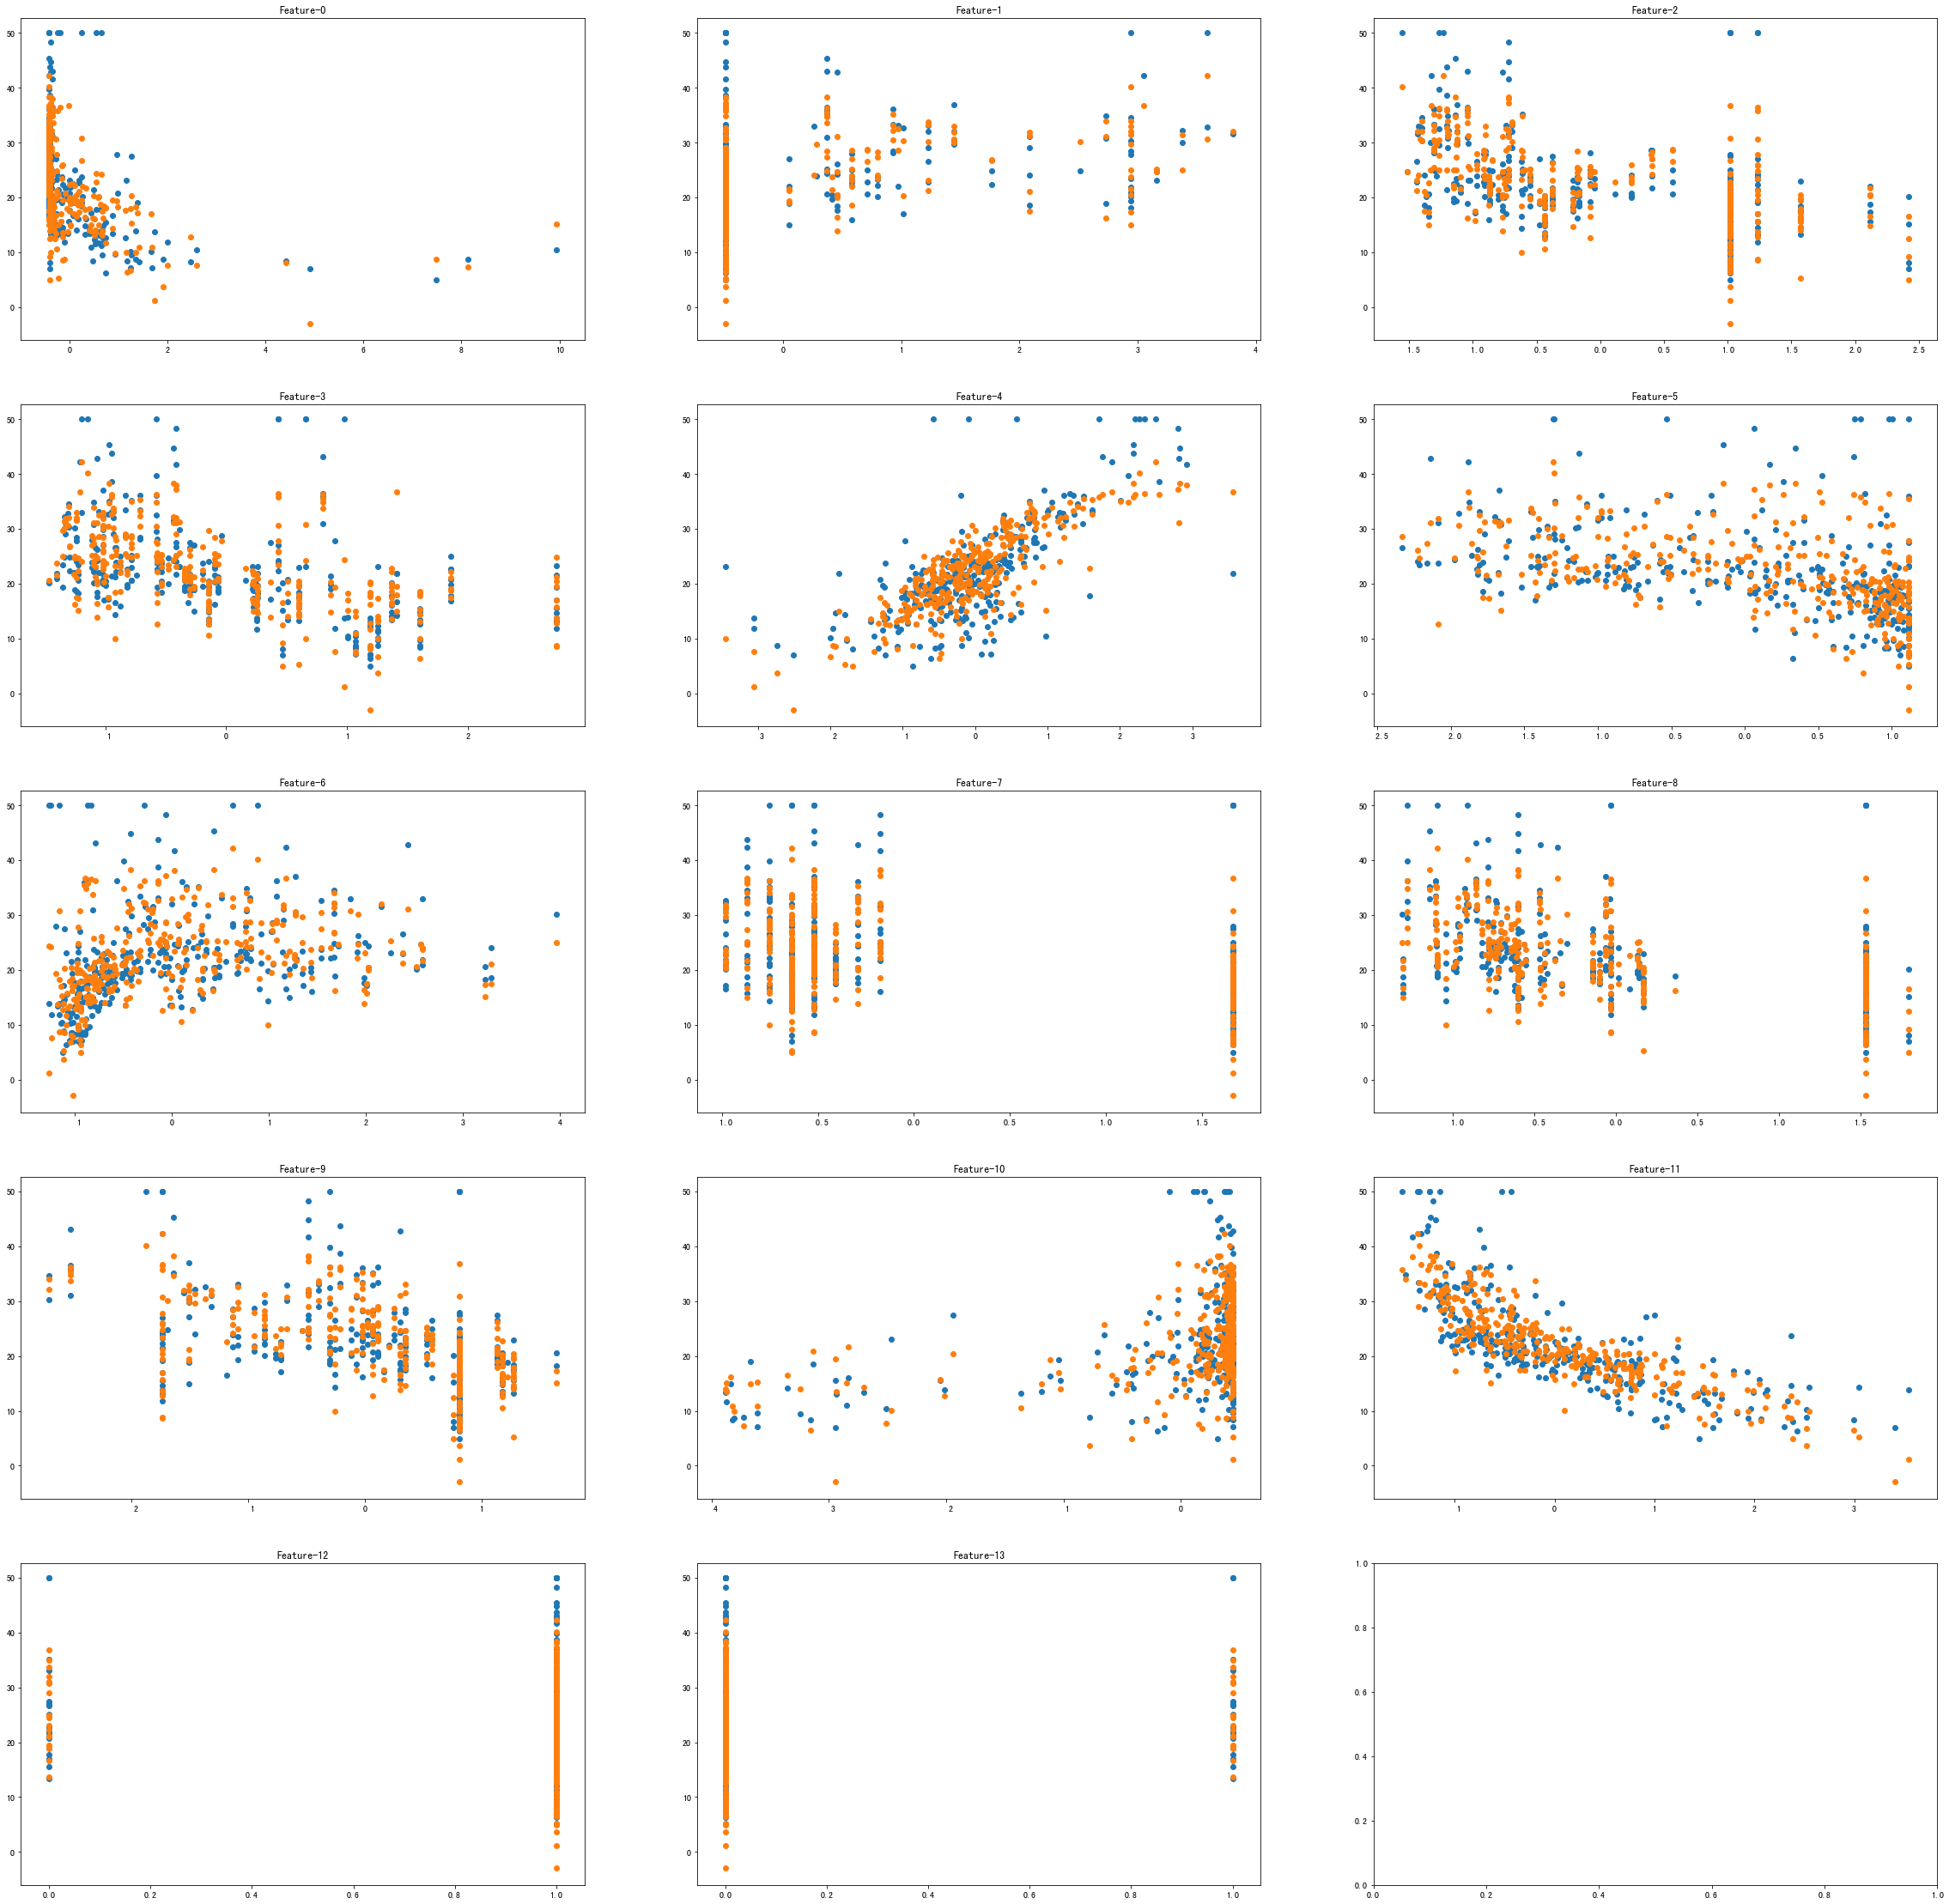

In [49]:
show_predication_result(X_train, y_train)

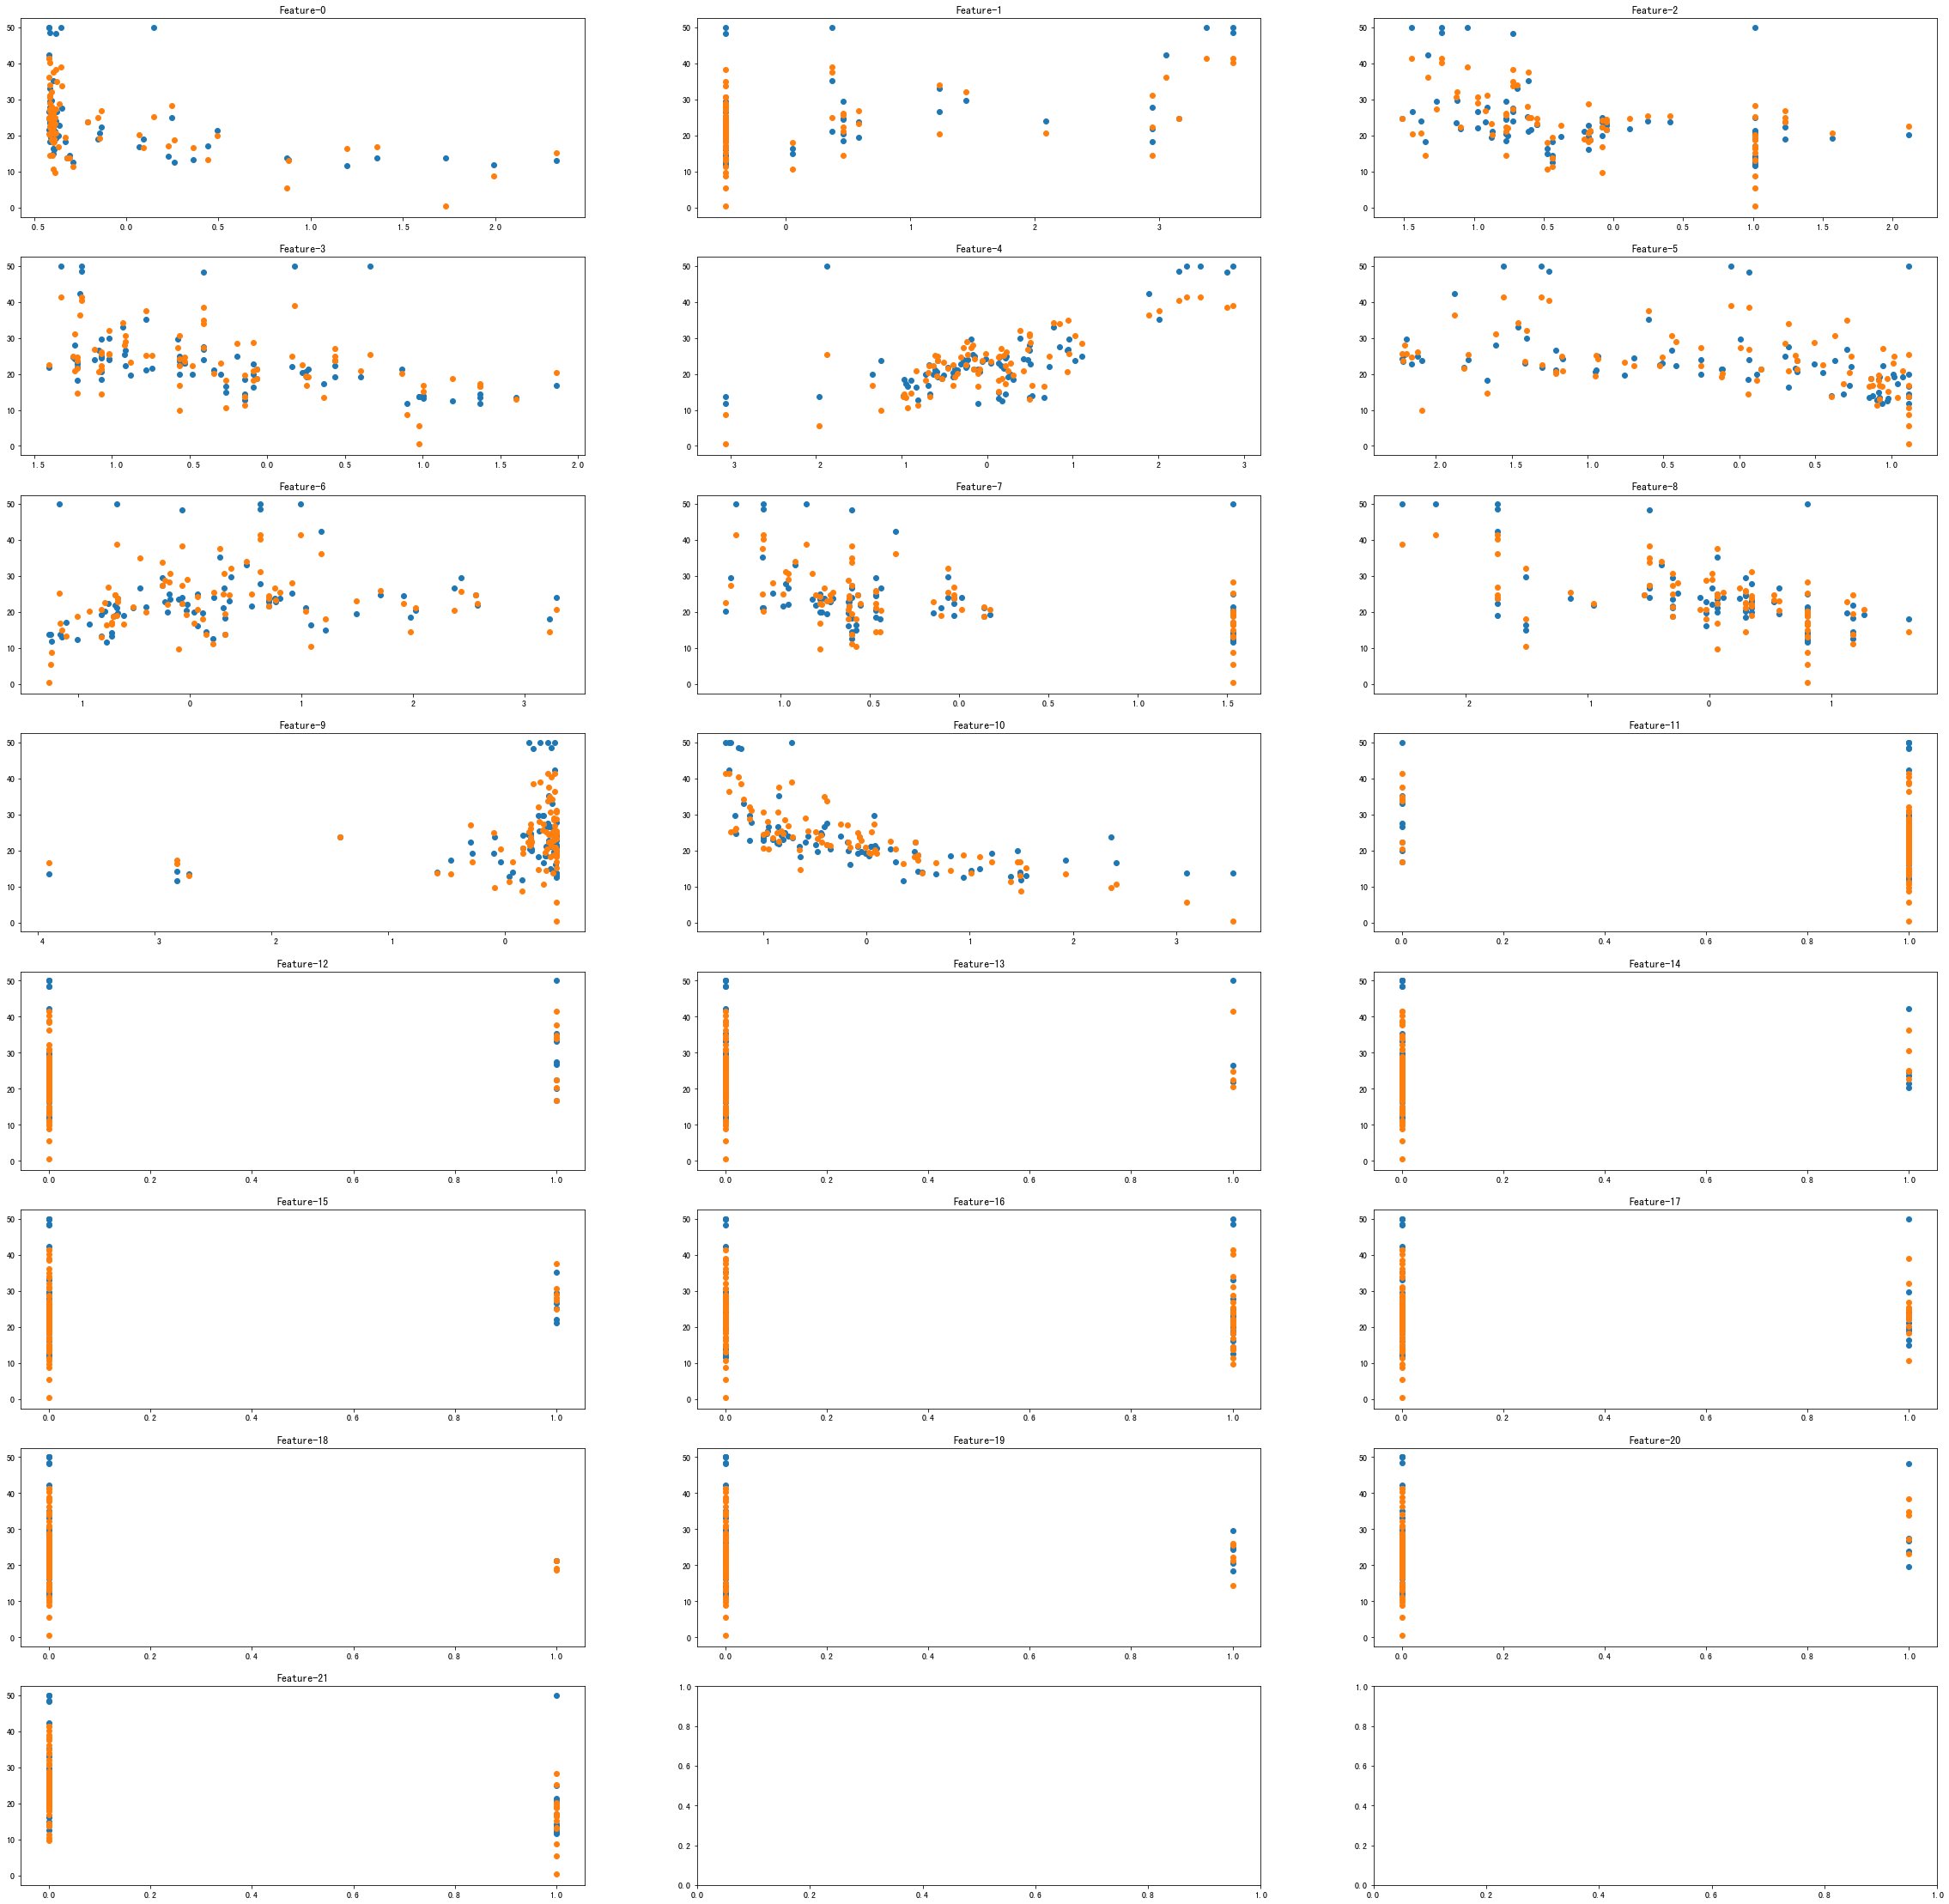

In [256]:
show_predication_result(X_val, y_val)

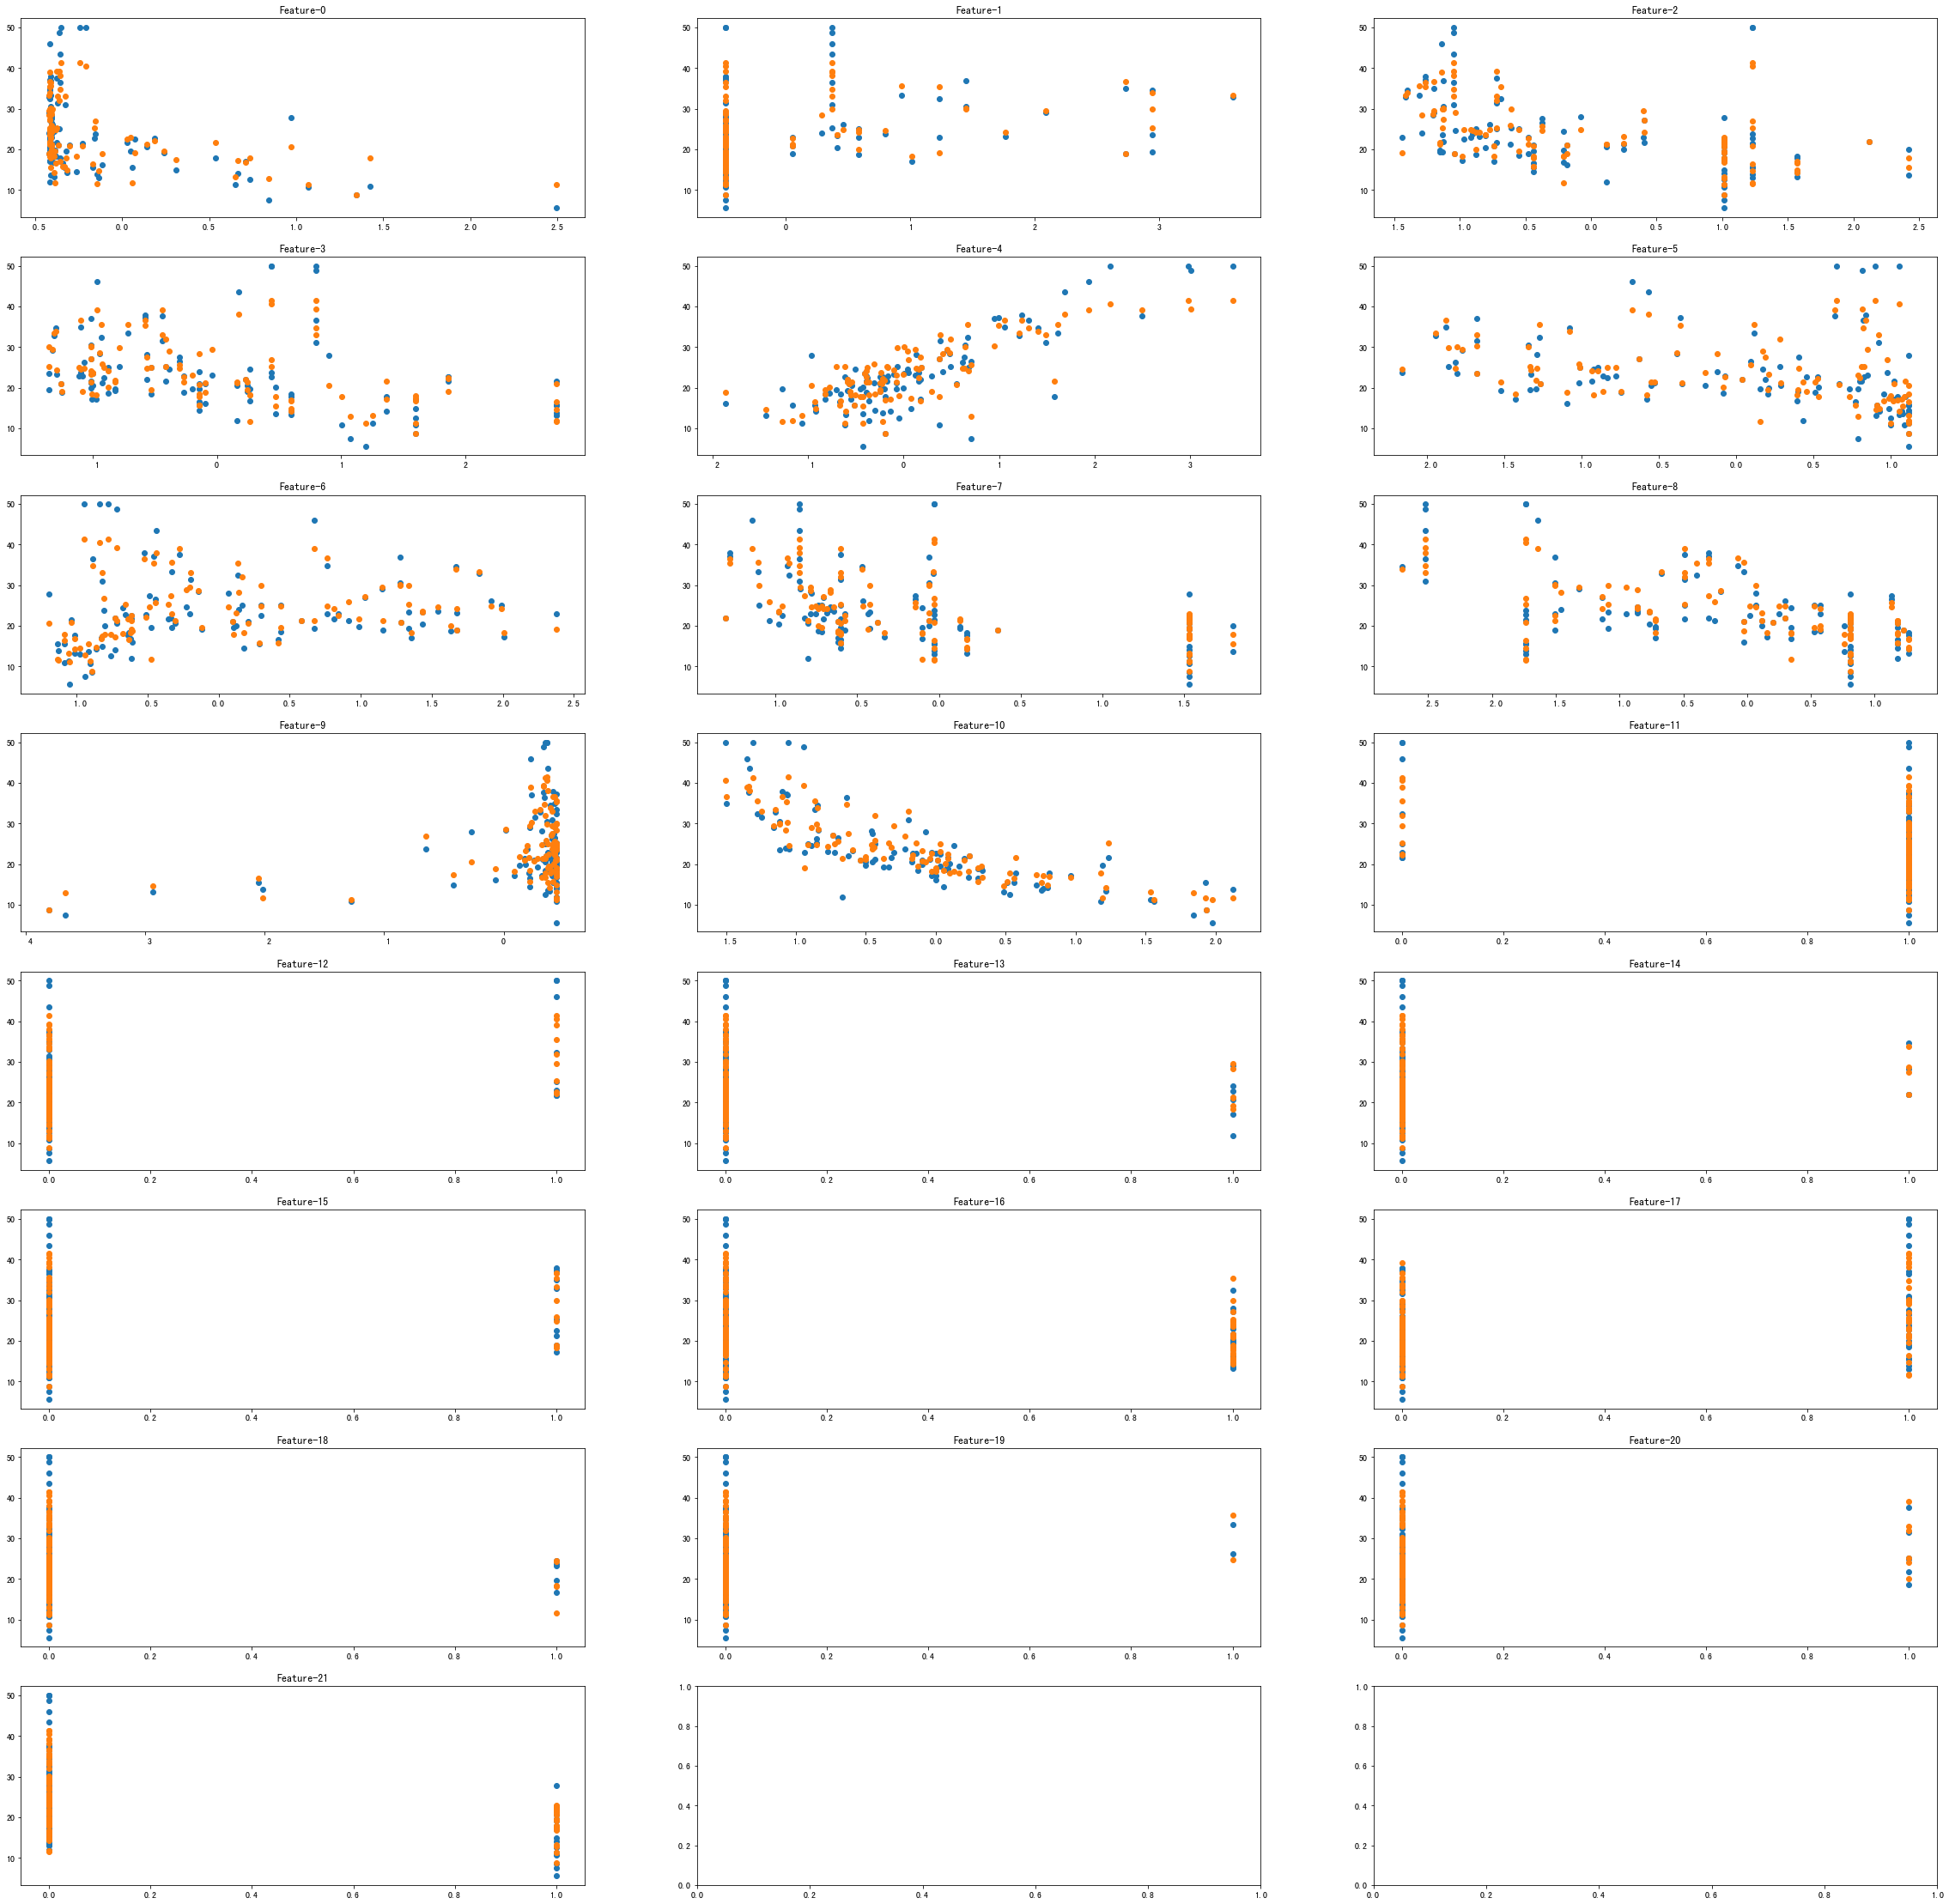

In [257]:
show_predication_result(X_test, y_test)

## Outlinear （异常值）

##  Part-02 Logstic Regression

1. Data 
+ Pre-processing 
+ Feature-Extractor
+ Split Training, Test, Validation
+ Build Model
+ Gradient Descent 
+ Evaluation
+ Predicat
+ Analysis

### Data

MNIST: http://yann.lecun.com/exdb/mnist/

In [259]:
!gzip -d dataset/*.gz

In [261]:
!ls dataset/

t10k-images-idx3-ubyte  train-images-idx3-ubyte
t10k-labels-idx1-ubyte  train-labels-idx1-ubyte


### Pre-processing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from struct import unpack

In [3]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [4]:
train_x, train_y = loadmnist('dataset/t10k-images-idx3-ubyte', 'dataset/t10k-labels-idx1-ubyte')

In [5]:
test_x, test_y = loadmnist('dataset/train-images-idx3-ubyte', 'dataset/train-labels-idx1-ubyte')

In [6]:
train_x.shape

(10000, 784)

In [7]:
test_x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [8]:
test_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

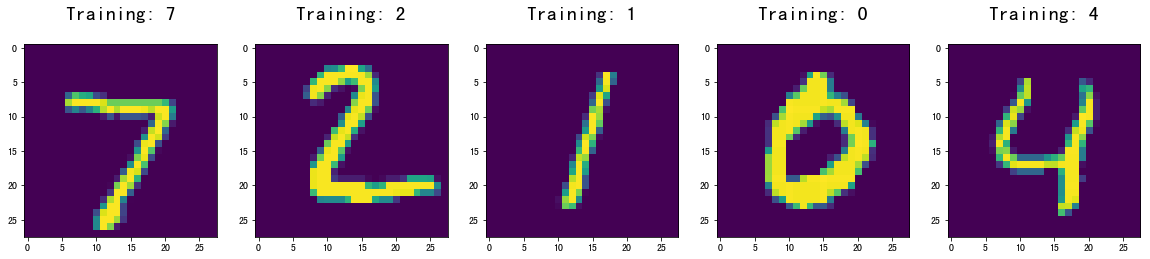

In [9]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_x[0:5], train_y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)))
    plt.title('Training: %i\n' % label, fontsize = 20)

## we only choose label with 0 and 6

In [10]:
zero_train_indices = np.where(train_y == 0)
one_train_indices = np.where(train_y == 6)
train_indices = np.concatenate((zero_train_indices[0], one_train_indices[0]))

zero_test_indices = np.where(test_y == 0)
one_test_indices = np.where(test_y == 6)
test_indices = np.concatenate((zero_test_indices[0], one_test_indices[0]))

In [11]:
train_indices = np.random.choice(train_indices, size=len(train_indices), replace=False)
test_indices = np.random.choice(test_indices, size=len(test_indices), replace=False)

In [12]:
val_ratio = 0.2

train_indices = train_indices[: int(len(train_indices) * (1 - val_ratio))]
val_indices = train_indices[int(len(train_indices) * (1 - val_ratio)):]

In [13]:
binary_x_train = train_x[train_indices]
binary_x_test = test_x[test_indices]
binary_x_val = train_x[val_indices]

binary_y_val = train_y[val_indices]
binary_y_train = train_y[train_indices]
binary_y_test = test_y[test_indices]

In [14]:
import random

In [15]:
binary_y_train

array([0, 6, 6, ..., 0, 0, 6], dtype=uint8)

Text(0.5, 1.0, 'Training: 6\n')

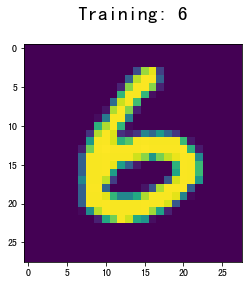

In [16]:
plt.imshow(np.reshape(binary_x_train[1], (28,28)))
plt.title('Training: %i\n' % binary_y_train[1], fontsize = 20)

In [17]:
from collections import Counter

In [18]:
Counter(binary_y_train)

Counter({0: 766, 6: 784})

In [19]:
Counter(binary_y_test)

Counter({0: 5923, 6: 5918})

In [20]:
Counter(binary_y_val)

Counter({6: 172, 0: 138})

## Build Model

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
clf = LogisticRegression(random_state=0, solver='lbfgs')
# L-BFGS-B – Software for Large-scale Bound-constrained Optimization

In [23]:
clf.fit(binary_x_train, binary_y_train)

/Users/gaominquan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
clf.coef_

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.52865762e-08,  9.11642836e-07,
         1.32059256e-04,  6.96834810e-05,  3.61354973e-06,
         4.14971795e-06,  3.36664231e-06,  3.57222646e-06,
         8.87976959e-06,  3.15411232e-06,  9.09519921e-07,
         3.38086448e-07,  0.00000000e+00,  0.00000000e+0

In [25]:
clf.intercept_

array([0.00016563])

In [26]:
#??clf.score

In [27]:
clf.score(binary_x_train, binary_y_train)

1.0

In [28]:
clf.score(binary_x_val, binary_y_val)

1.0

In [29]:
binary_x_test.shape

(11841, 784)

In [30]:
binary_y_test.shape

(11841,)

In [31]:
clf.score(binary_x_test, binary_y_test)

0.9871632463474369

In [32]:
predicated_result = clf.predict(binary_x_test)

In [33]:
np.where(binary_y_test != predicated_result)

(array([  200,   379,   395,   434,   450,   494,   562,   610,   693,
          912,   933,   977,  1080,  1087,  1152,  1331,  1348,  1491,
         1523,  1560,  1576,  1734,  1886,  1927,  2003,  2016,  2022,
         2055,  2171,  2396,  2442,  2458,  2959,  3091,  3129,  3399,
         3461,  3501,  3528,  3683,  3685,  3721,  3782,  3841,  3897,
         3965,  4031,  4188,  4209,  4367,  4386,  4646,  4659,  4698,
         4714,  4719,  4724,  4756,  4797,  4808,  5036,  5041,  5086,
         5154,  5183,  5260,  5331,  5352,  5413,  5418,  5441,  5633,
         5723,  5728,  5748,  5826,  5996,  6008,  6222,  6242,  6282,
         6304,  6357,  6387,  6403,  6633,  6705,  6766,  6806,  6823,
         6854,  6963,  7390,  7465,  7531,  7568,  7611,  7621,  7626,
         7673,  7675,  7786,  7938,  8041,  8067,  8170,  8177,  8318,
         8517,  8551,  8588,  8614,  8631,  8678,  8874,  8975,  9015,
         9016,  9024,  9057,  9073,  9076,  9179,  9383,  9437,  9489,
      

Text(0.5, 1.0, 'Actual Value: 0 ; Predict Value: 0 \n')

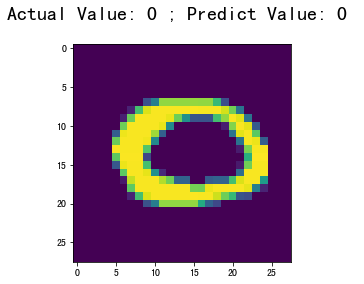

In [34]:
lookup_index = 1184

plt.imshow(np.reshape(binary_x_test[lookup_index], (28,28)))
plt.title('Actual Value: {} ; Predict Value: {} \n'.format(binary_y_test[lookup_index], predicated_result[lookup_index]), fontsize = 20)

In [35]:
from sklearn import metrics

In [36]:
binary_y_test[0]

0

In [37]:
predicated_result[0]

0

In [45]:
metrics.precision_score(binary_y_test, predicated_result)

ValueError: pos_label=1 is not a valid label: array([0, 6], dtype=uint8)

In [38]:
metrics.precision_score(binary_y_test, predicated_result, pos_label=6)

0.9842122942559623

In [39]:
metrics.recall_score(binary_y_test, predicated_result, pos_label=6)

0.9901993916863805

In [40]:
fpr, tpr, threshold = metrics.roc_curve(binary_y_test, predicated_result, pos_label=6)

In [41]:
metrics.auc(fpr, tpr)

0.9871645278539956

In [42]:
cm = metrics.confusion_matrix(binary_y_test, predicated_result)

In [43]:
import seaborn as sn

In [44]:
??sns.heatmap

Object `sns.heatmap` not found.


In [45]:
from sklearn.metrics import confusion_matrix

data = confusion_matrix(binary_y_test, predicated_result)

In [46]:
data

array([[5829,   94],
       [  58, 5860]])

In [47]:
df_cm = pd.DataFrame(data, columns=np.unique(binary_y_test), index = np.unique(binary_y_test))

# 
# 
# plt.figure(figsize = (10,7))
# sn.set(font_scale=1.4)#for label size
# sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [48]:
df_cm.index.name = 'Actual'

In [49]:
df_cm.columns.name = 'Predicted'

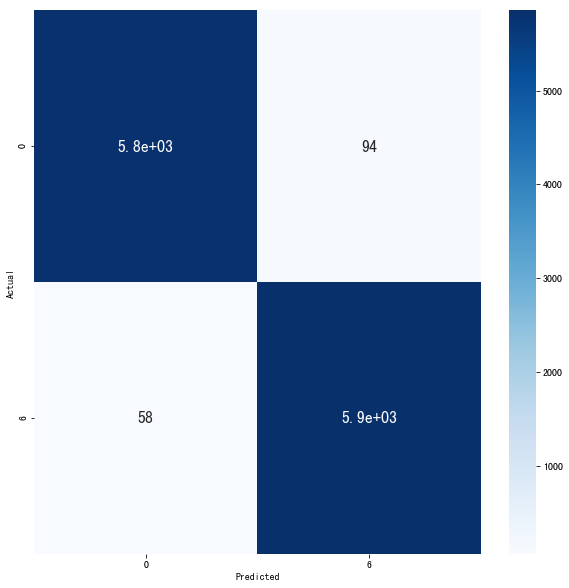

In [57]:
plt.figure(figsize=(10, 10))
sn.heatmap(df_cm, cmap='Blues', annot=True, annot_kws={"size": 16})